<div id="custom-header" style="padding: 15px; color: white; margin: 0; font-size: 28px; font-family: 'Times New Roman', Times, serif; text-align: center; display: fill; border-radius: 15px; background-color: #6D214F; overflow: hidden; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <b> Attrition Alchemy👨‍💼:- Data-Driven Insights 📊 and Predictive Strategies 🪄 for Employee Retention </b>
</div>


<div style="border-radius:10px;border:black solid;padding: 15px;background-color:white;font-family: 'Times New Roman', Times, serif;font-size:110%;text-align:left">

<h3 align="left"><font color=#6D214F>📝 Project Description:</font></h3>   
 
   
*A large company named XYZ employs, at any given point in time, around 4000 employees. However, every year, approximately 15% of its employees leave the company and need to be replaced with talent from the job market. The management believes that this level of attrition (employees leaving, either voluntarily or due to termination) is detrimental to the company for the following reasns:

- Former employees’ projects get delayed, making it difficult to meet timelines and resulting in a loss of reputation among consumers and partners.
- A sizable department has to be maintained for recruiting new talent.
- New employees often need to be trained for the job and/or given time to acclimate themselves to the company.

Hence, the management has contracted an HR analytics firm to understand the factors they should focus on to curb attrition. In other words, they want to know what changes they should make to their workplace to retain most of their employees. Additionally, they want to identify which of these variables is the most important and needs to be addressed promptly.
    
<h3 align="left"><font color=#6D214F> Purpose: </font></h3>

This project selects this topic and dataset for the following purposes:

- Discovering the factors that affect employee attrition and implementing measures to reduce this rate.
- Building a machine learning model based on employee factors to predict whether an employee is likely to experience attrition.
- Creating an Executive Dashboard to present insights on attrition.
 Attritionion or not? 
    
    

<div id="custom-header" style="padding: 0px; color: white; margin: 0; font-size: 22px; font-family: 'Times New Roman', Times, serif; text-align: center; display: fill; border-radius: 10px; background-color: #6D214F; overflow: hidden; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <b>  Importing Libraries </b>
</div>

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
from pprint import PrettyPrinter
from datetime import datetime, time

#Data visualization libraries
import seaborn as sns
sns.set()
import plotly.express as px
import matplotlib.pyplot as plt

#Machine learning libraries
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix
)

#Ignore FutureWarnings to avoid clutter in the output
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

#Initialize PrettyPrinter for neat printing
pp = PrettyPrinter(indent=2)


In [2]:
#Set the maximum number of displayed columns for Pandas DataFrames to 'None' (display all columns)
pd.set_option('display.max_columns', None)
#Set the maximum number of displayed rows for Pandas DataFrames to 30
pd.set_option('display.max_rows', 30)

<div id="custom-header" style="padding: 0px; color: white; margin: 0; font-size: 22px; font-family: 'Times New Roman', Times, serif; text-align: center; display: fill; border-radius: 10px; background-color: #6D214F; overflow: hidden; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <b>  Loading Dataset </b>
</div>

In [3]:
df_orginal=pd.read_csv(r"C:\Users\ksund\Music\project_final\Combined_attrition_data")
df=df_orginal.copy()

In [4]:
#Read the original CSV file into a DataFrame
df_original = pd.read_csv(r"C:\Users\ksund\Music\project_final\Combined_attrition_data")

#Create a copy of the original DataFrame to work with
df = df_original.copy()

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;text-align:left">
- The DataFrame 'df' is now a copy of the original DataFrame, allowing us to perform operations on it without modifying the original data.
- Any changes made to 'df' will not impact 'df_original.'
- At this point, we have the flexibility to explore and analyze the DataFrame 'df' further, conduct data preprocessing, or use it for modeling purposes.
- If changes are made to 'df' and there's a need to revert to the original data, it's possible to refer back to 'df_origial.'


<div id="custom-header" style="padding: 0px; color: white; margin: 0; font-size: 22px; font-family: 'Times New Roman', Times, serif; text-align: center; display: fill; border-radius: 10px; background-color: #6D214F; overflow: hidden; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <b>  Data Wrangling </b>
</div>

In [5]:
#Display the shape of the DataFrame (number of rows and columns)
df.shape

(4410, 31)

In [6]:
#Provide information about the DataFrame, including data types and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   JobInvolvement           4410 non-null   int64  
 2   PerformanceRating        4410 non-null   int64  
 3   Avg_Working_time         4410 non-null   object 
 4   Over_time_Worked         4410 non-null   object 
 5   EnvironmentSatisfaction  4410 non-null   float64
 6   JobSatisfaction          4410 non-null   float64
 7   WorkLifeBalance          4410 non-null   float64
 8   Age                      4410 non-null   int64  
 9   Attrition                4410 non-null   object 
 10  BusinessTravel           4410 non-null   object 
 11  Department               4410 non-null   object 
 12  DistanceFromHome         4410 non-null   int64  
 13  Education                4410 non-null   int64  
 14  EducationField          

In [7]:
#Display the first 30 rows of the DataFrame
df.head(30)

EmployeeID  JobInvolvement  PerformanceRating           Avg_Working_time  \
0            1               3                  3  0 days 07:22:25.142241379   
1            2               2                  4  0 days 07:43:08.288135593   
2            3               3                  3  0 days 07:00:47.665289256   
3            4               2                  3  0 days 07:11:37.242553191   
4            5               3                  3  0 days 08:00:22.228571428   
5            6               3                  3  0 days 10:47:45.945147679   
6            7               3                  4  0 days 06:55:24.853448275   
7            8               3                  4  0 days 06:43:32.234567901   
8            9               3                  4  0 days 07:14:11.395652173   
9           10               3                  3  0 days 07:04:48.316239316   
10          11               2                  3  0 days 08:24:12.547717842   
11          12               3                  3  0 days 07:04:08.236514522   
12          13               3                  3  0 days 09:18:05.074235807   
13          14               2                  3  0 days 09:23:59.753191489   
14          15               3                  3  0 days 06:05:22.875518672   
15          16               3                  3  0 days 06:42:18.628691983   
16          17               2                  3  0 days 06:37:08.546255506   
17          18               3                  3  0 days 11:00:51.581300813   
18          19               2                  3  0 days 06:57:36.913793103   
19          20               3                  3  0 days 09:17:36.800865800   
20          21               3                  3  0 days 07:35:26.801724137   
21          22               2                  4  0 days 06:00:31.008583690   
22          23               3                  3  0 days 08:24:07.590517241   
23          24               1                  3  0 days 06:48:25.219008264   
24          25               3                  3  0 days 07:05:35.402597402   
25          26               3                  3  0 days 09:21:43.207468879   
26          27               3                  4  0 days 10:58:37.644351464   
27          28               3                  3            0 days 07:36:16   
28          29               2                  3  0 days 10:58:39.308641975   
29          30               2                  3  0 days 06:49:52.591304347   

   Over_time_Worked  EnvironmentSatisfaction  JobSatisfaction  \
0                No                      3.0              4.0   
1                No                      3.0              2.0   
2                No                      2.0              2.0   
3                No                      4.0              4.0   
4               Yes                      4.0              1.0   
5               Yes                      3.0              2.0   
6                No                      1.0              3.0   
7                No                      1.0              2.0   
8                No                      2.0              4.0   
9                No                      2.0              1.0   
10              Yes                      3.0              4.0   
11               No                      3.0              4.0   
12              Yes                      4.0              1.0   
13              Yes                      1.0              2.0   
14               No                      4.0              4.0   
15               No                      3.0              4.0   
16               No                      4.0              3.0   
17              Yes                      1.0              4.0   
18               No                      2.0              2.0   
19              Yes                      1.0              1.0   
20               No                      3.0              2.0   
21               No                      1.0              2.0   
22              Yes         

In [8]:
#Display descriptive statistics for numerical columns in the DataFrame
df.describe()

EmployeeID  JobInvolvement  PerformanceRating  \
count  4410.000000     4410.000000        4410.000000   
mean   2205.500000        2.729932           3.153741   
std    1273.201673        0.711400           0.360742   
min       1.000000        1.000000           3.000000   
25%    1103.250000        2.000000           3.000000   
50%    2205.500000        3.000000           3.000000   
75%    3307.750000        3.000000           3.000000   
max    4410.000000        4.000000           4.000000   

       EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance          Age  \
count              4410.000000      4410.000000      4410.000000  4410.000000   
mean                  2.725170         2.734014         2.763492    36.923810   
std                   1.089852         1.102071         0.703541     9.133301   
min                   1.000000         1.000000         1.000000    18.000000   
25%                   2.000000         2.000000         2.000000    30.000000   
50%                   3.000000         3.000000         3.000000    36.000000   
75%                   4.000000         4.000000         3.000000    43.000000   
max                   4.000000         4.000000         4.000000    60.000000   

       DistanceFromHome    Education  EmployeeCount     JobLevel  \
count       4410.000000  4410.000000         4410.0  4410.000000   
mean           9.192517     2.912925            1.0     2.063946   
std            8.105026     1.023933            0.0     1.106689   
min            1.000000     1.000000            1.0     1.000000   
25%            2.000000     2.000000            1.0     1.000000   
50%            7.000000     3.000000            1.0     2.000000   
75%           14.000000     4.000000            1.0     3.000000   
max           29.000000     5.000000            1.0     5.000000   

       MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  StandardHours  \
count    4410.000000         4410.000000        4410.000000         4410.0   
mean    65029.312925            2.683220          15.209524            8.0   
std     47068.888559            2.499737           3.659108            0.0   
min     10090.000000            0.000000          11.000000            8.0   
25%     29110.000000            1.000000          12.000000            8.0   
50%     49190.000000            2.000000          14.000000            8.0   
75%     83800.000000            4.000000          18.000000            8.0   
max    199990.000000            9.000000          25.000000            8.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       4410.000000        4410.000000            4410.000000   
mean           0.793878          11.275737               2.799320   
std            0.851883           7.780539               1.288978   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       YearsAtCompany  YearsSinceLastPromotion  YearsWithCurrManager  
count     4410.000000              4410.000000           4410.000000  
mean         7.008163                 2.187755              4.123129  
std          6.125135                 3.221699              3.567327  
min          0.000000                 0.000000              0.000000  
25%          3.000000                 0.000000              2.000000  
50%          5.000000                 1.000000              3.000000  
75%          9.000000                 3.000000              7.000000  
max         40.000000                15.000000             17.000000

In [9]:
#Display descriptive statistics for categorical (object) columns in the DataFrame
df.describe(include="O")

Avg_Working_time Over_time_Worked Attrition BusinessTravel  \
count                        4410             4410      4410           4410   
unique                       4410                2         2              3   
top     0 days 07:22:25.142241379               No        No  Travel_Rarely   
freq                            1             3087      3699           3129   

                    Department EducationField Gender          JobRole  \
count                     4410           4410   4410             4410   
unique                       3              6      2                9   
top     Research & Development  Life Sciences   Male  Sales Executive   
freq                      2883           1818   2646              978   

       MaritalStatus Over18  
count           4410   4410  
unique             3      1  
top          Married      Y  
freq            2019   4410

In [10]:
#Drop specified columns from the DataFrame and modify it in place
df.drop(columns=['Avg_Working_time','Over18', 'EmployeeID','EmployeeCount','StandardHours'],inplace=True)
#Get the names of categorical columns in the DataFrame
categorical_columns=df.select_dtypes(include='O').columns
#Get the names of numerical columns in the DataFrame
numerical_columns=df.select_dtypes(include='number').columns

In [11]:
#print the names of categorical columns in the DataFrame
categorical_columns

Index(['Over_time_Worked', 'Attrition', 'BusinessTravel', 'Department',
       'EducationField', 'Gender', 'JobRole', 'MaritalStatus'],
      dtype='object')

In [12]:
#print the names of categorical columns in the DataFrame
numerical_columns

Index(['JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'WorkLifeBalance', 'Age', 'DistanceFromHome',
       'Education', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [13]:
#Iterate over each categorical column in the DataFrame
for i in categorical_columns:
    #Print the unique values of the current categorical column
    print('Unique values of', i, set(df[i]))
    #Print the count of each unique value in the current categorical column
    print(df[i].value_counts())
    #Print a separator line for better readability
    print('-' * 50)

Unique values of Over_time_Worked {'Yes', 'No'}
Over_time_Worked
No     3087
Yes    1323
Name: count, dtype: int64
--------------------------------------------------
Unique values of Attrition {'Yes', 'No'}
Attrition
No     3699
Yes     711
Name: count, dtype: int64
--------------------------------------------------
Unique values of BusinessTravel {'Travel_Frequently', 'Non-Travel', 'Travel_Rarely'}
BusinessTravel
Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: count, dtype: int64
--------------------------------------------------
Unique values of Department {'Sales', 'Human Resources', 'Research & Development'}
Department
Research & Development    2883
Sales                     1338
Human Resources            189
Name: count, dtype: int64
--------------------------------------------------
Unique values of EducationField {'Medical', 'Marketing', 'Technical Degree', 'Other', 'Human Resources', 'Life Sciences'}
EducationField
Life Sciences       1818
M

<div id="custom-header" style="padding: 0px; color: white; margin: 0; font-size: 22px; font-family: 'Times New Roman', Times, serif; text-align: center; display: fill; border-radius: 10px; background-color: #6D214F; overflow: hidden; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <b>  Exploratory Data Analysis </b>
</div>

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:0;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px;border-style: solid;border-color: dark green;"> 1-Attrition Count </div> 

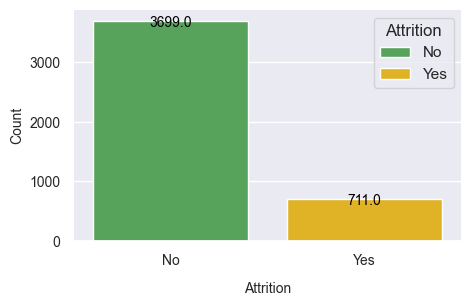

In [14]:
#Set a custom color palette
colors = ["#4CAF50", "#FFC107"]  # Green for 'No', Amber for 'Yes'
#Set the figure size
plt.figure(figsize=(5, 3))
#Use a horizontal countplot with custom colors
fig = sns.countplot(data=df,x=df.Attrition, orient='h', palette=colors,hue=df.Attrition,legend=True)
sns.despine(left=True)
#Set labels and font sizes
fig.set_ylabel('Count', fontsize=10)
fig.set_xlabel('Attrition', fontsize=10, rotation=0, labelpad=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#Display the plot
for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:}'.format(p.get_height()), (x.mean(), y-150), ha='center', va='bottom', fontsize=10, color='black')
plt.show();

In [15]:
#Attrition Percentage
print('Percentage breakdown of Attrition')
print('-'*33)
round(df.Attrition.value_counts(normalize=True)*100,2)

Percentage breakdown of Attrition
---------------------------------


Attrition
No     83.88
Yes    16.12
Name: proportion, dtype: float64

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:0;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px;border-style: solid;border-color: dark green;"> 2-Distribution of Age </div> 

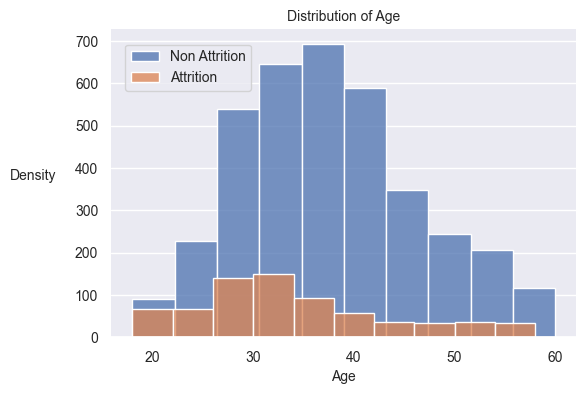

In [16]:

#Set the figure size
plt.figure(figsize=(6, 4))
#Plot the distribution of Age where attrition is false
sns.histplot(df[df['Attrition'] == 'No']['Age'], label='Non Attrition', kde=False, bins=10)
#Plot the distribution of Age where attrition is true
sns.histplot(df[df['Attrition'] == 'Yes']['Age'], label='Attrition', kde=False, bins=10)
#Remove the spines on the left
sns.despine(left=True)
#Remove the vertical gridlines
plt.grid(axis='x')
#Set labels and font sizes
plt.xlabel('Age', fontsize=10)
plt.ylabel('Density', fontsize=10, rotation=0, labelpad=30)
plt.title('Distribution of Age', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#Adjust the legend size and position
plt.legend(fontsize='small', bbox_to_anchor=(0.03, 0.95), loc=2, borderaxespad=0., frameon=1)
#Display the plot
plt.show();

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:0;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px;border-style: solid;border-color: dark green;"> 3-Job Level Attrition </div> 

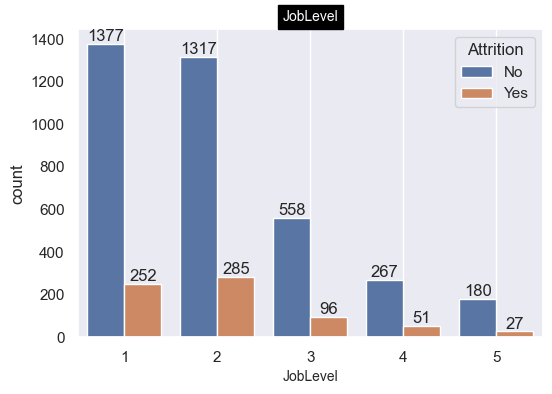

In [17]:
#Create a countplot to visualize the distribution of 'JobLevel' with respect to 'Attrition'
plt.figure(figsize=(6, 4))
#Use Seaborn's countplot to show the count of each 'JobLevel' category, differentiated by 'Attrition'
ax = sns.countplot(x=df['JobLevel'], data=df, hue="Attrition")
#Add labels to the bars in the countplot
for container in ax.containers:
    ax.bar_label(container)
#Set plot title and axis labels
plt.title('JobLevel', backgroundcolor='black', color='white', fontsize=10)
plt.xlabel('JobLevel', fontsize=10)
#Display grid lines
plt.grid()
#Show the plot
plt.show();

In [18]:
#Grouping the DataFrame 'df' by 'Attrition', 'Gender', and 'MaritalStatus' and calculating the count of each group
gender_atr_df = df.groupby(['Attrition', 'Gender', 'MaritalStatus']).size().reset_index(name='Count')
#Selecting rows where 'Attrition' is 'Yes' to create a DataFrame for employees with attrition
gen_attrition_yes_df = gender_atr_df[gender_atr_df['Attrition'] == 'Yes']
#Displaying the resulting DataFrame for employees with attrition
gen_attrition_yes_df

Attrition  Gender MaritalStatus  Count
6        Yes  Female      Divorced     33
7        Yes  Female       Married    108
8        Yes  Female        Single    129
9        Yes    Male      Divorced     66
10       Yes    Male       Married    144
11       Yes    Male        Single    231

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:0;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px;border-style: solid;border-color: dark green;"> 4-Attrition Count by Gender and Marital Status</div> 

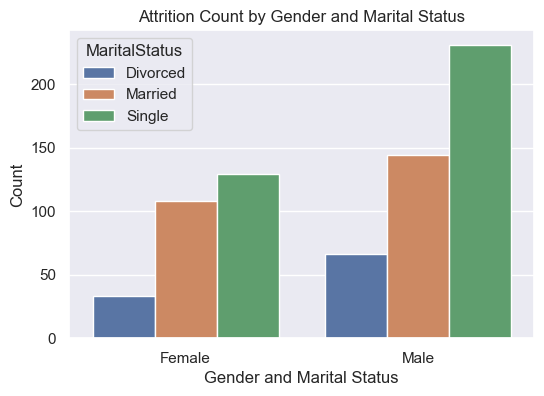

In [19]:
#Create a grouped bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='Count', hue='MaritalStatus', data=gen_attrition_yes_df)
#Add labels and title
plt.xlabel('Gender and Marital Status') 
plt.ylabel('Count')
plt.title('Attrition Count by Gender and Marital Status')
#Show the plot
plt.show();

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:0;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px;border-style: solid;border-color: dark green;"> 5-Attrition Count by Employee Stasification</div> 

C:\Users\ksund\AppData\Local\Temp\ipykernel_3852\1188385914.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_yes['Employee_Satisfaction'] = x_yes['JobSatisfaction'] + x_yes['EnvironmentSatisfaction'] + x_yes['WorkLifeBalance']


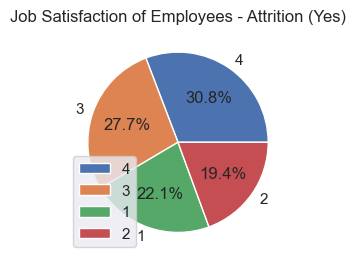

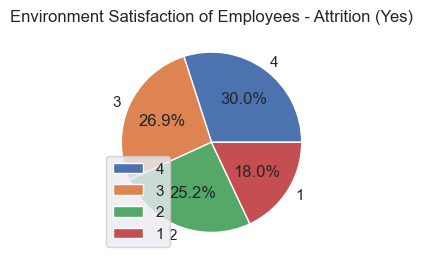

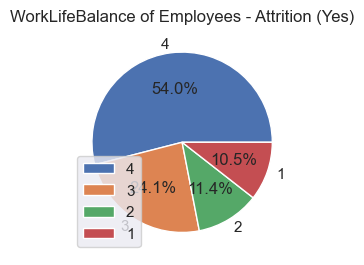

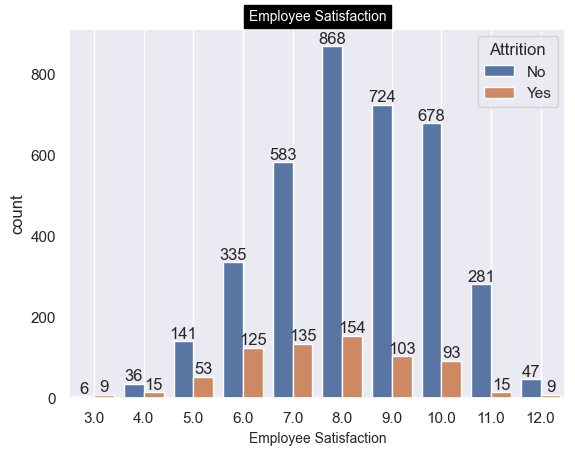

In [20]:
#Filtering DataFrame 'df' to include only rows where 'Attrition' is 'Yes'
x_yes = df[df['Attrition'] == 'Yes']
#Calculating 'Employee_Satisfaction' by summing 'JobSatisfaction', 'EnvironmentSatisfaction', and 'WorkLifeBalance'
x_yes['Employee_Satisfaction'] = x_yes['JobSatisfaction'] + x_yes['EnvironmentSatisfaction'] + x_yes['WorkLifeBalance']

#Pie chart for Job Satisfaction distribution of employees with Attrition (Yes)
y1 = x_yes['JobSatisfaction'].value_counts()
labels = ['4', '3', '1', '2']
plt.subplot(1, 2, 1)
plt.pie(y1, labels=labels, autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Job Satisfaction of Employees - Attrition (Yes)')
plt.show()

#Pie chart for Environment Satisfaction distribution of employees with Attrition (Yes)
y2 = x_yes['EnvironmentSatisfaction'].value_counts()
labels = ['4', '3', '2', '1']
plt.subplot(1, 2, 2)
plt.pie(y2, labels=labels, autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Environment Satisfaction of Employees - Attrition (Yes)')
plt.show()

#Pie chart for WorkLifeBalance distribution of employees with Attrition (Yes)
y3 = x_yes['WorkLifeBalance'].value_counts()
labels = ['4', '3', '2', '1']
plt.subplot(1, 2, 2)
plt.pie(y3, labels=labels, autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('WorkLifeBalance of Employees - Attrition (Yes)')
plt.show()

#Creating a new DataFrame 'y4' and calculating 'Employee_Satisfaction' for all employees
y4 = df.copy()
y4['Employee_Satisfaction'] = y4['JobSatisfaction'] + y4['EnvironmentSatisfaction'] + y4['WorkLifeBalance']
#Countplot for Employee Satisfaction distribution for all employees
ax = sns.countplot(x=y4['Employee_Satisfaction'], data=y4, hue="Attrition")
for container in ax.containers:
    ax.bar_label(container)
plt.title('Employee Satisfaction', backgroundcolor='black', color='white', fontsize=10)
plt.xlabel('Employee Satisfaction', fontsize=10)
plt.grid()
plt.show();

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:0;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px;border-style: solid;border-color: dark green;"> 6-Attrition Count based on Overtime Work of Employee</div> 

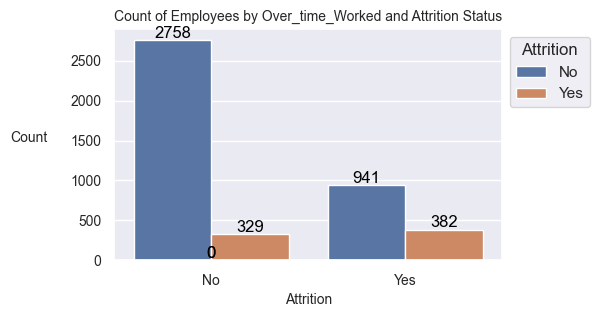

In [21]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Over_time_Worked', hue='Attrition', data=df, )
#Add count annotations on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.xlabel('Attrition', fontsize=10)
plt.ylabel('Count', fontsize=10, rotation=0, labelpad=30)
plt.title('Count of Employees by Over_time_Worked and Attrition Status', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Attrition',  bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:0;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px;border-style: solid;border-color: dark green;"> 7-Distribution of Monthly Income</div> 

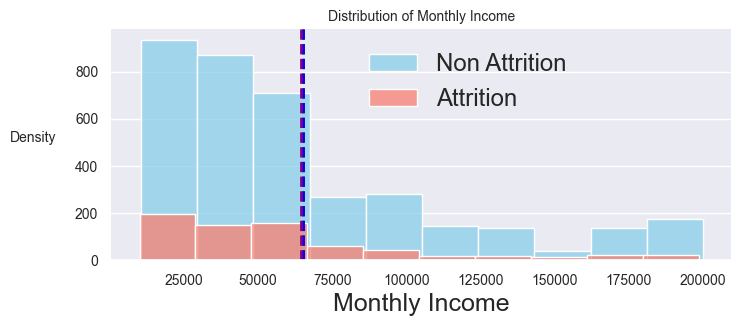

Overall Average Monthly Income: 65029.0
Average Monthly Income for Males: 65319.0
Average Monthly Income for Females: 64595.0


In [22]:
#Set the figure size
plt.figure(figsize=(8, 3))
#Create a histogram using histplot for Non-Attrition
sns.histplot(df[df['Attrition'] == 'No']['MonthlyIncome'], label='Non Attrition', kde=False, bins=10, color='skyblue')
#Create a histogram using histplot for Attrition
sns.histplot(df[df['Attrition'] == 'Yes']['MonthlyIncome'], label='Attrition', kde=False, bins=10, color='salmon')
#Remove the spines on the left
sns.despine(left=True)
#Remove the vertical gridlines
plt.grid(axis='x')
#Set labels and font sizes
plt.xlabel('Monthly Income', fontsize=18)
plt.ylabel('Density', fontsize=10, rotation=0, labelpad=30)
plt.title('Distribution of Monthly Income', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
#Adjust the legend size and position
plt.legend(fontsize='x-large', bbox_to_anchor=(0.4, 0.94), loc=2, borderaxespad=0., frameon=0)
#Display the average monthly income information
plt.axvline(df['MonthlyIncome'].mean(), color='green', linestyle='dashed', linewidth=2, label='Overall Mean')
plt.axvline(df[df['Gender'] == 'Male']['MonthlyIncome'].mean(), color='blue', linestyle='dashed', linewidth=2, label='Male Mean')
plt.axvline(df[df['Gender'] == 'Female']['MonthlyIncome'].mean(), color='purple', linestyle='dashed', linewidth=2, label='Female Mean')
#Display the plot
plt.show();
#Print average monthly income information
print('Overall Average Monthly Income:', df['MonthlyIncome'].mean().round())
print('Average Monthly Income for Males:', df[df['Gender'] == 'Male']['MonthlyIncome'].mean().round())
print('Average Monthly Income for Females:', df[df['Gender'] == 'Female']['MonthlyIncome'].mean().round())

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:0;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px;border-style: solid;border-color: dark green;"> 8-Attrition Based on Monthly Income,Job role</div> 

In [23]:
#Calculate the mean MonthlyIncome for each JobRole
income = df.groupby(by='JobRole').MonthlyIncome.mean()
income_df_jobrole = pd.DataFrame(income)
income_df_jobrole = income_df_jobrole.sort_values(by='MonthlyIncome')
#Get JobRoles with Attrition 'Yes' and their counts
jobrole_attrition = df[df['Attrition'] == 'Yes']['JobRole']
jobrole_atr_value_counts = jobrole_attrition.value_counts()
jobrole_atr_df = pd.DataFrame(jobrole_atr_value_counts)

#Create a copy of the DataFrame
df1 = df.copy()
#Map education levels to descriptive labels
df1['Education'] = df1['Education'].map({5: "Doctrate", 4: "Master's", 3: "Bachelor's", 2: "College", 1: "Below_college"})
#Calculate the mean MonthlyIncome for each Education level
edu_sal = df1.groupby('Education').MonthlyIncome.mean().round()
edu_sal_df = pd.DataFrame(edu_sal)
edu_sal_df = edu_sal_df.sort_values('MonthlyIncome', ascending=False)

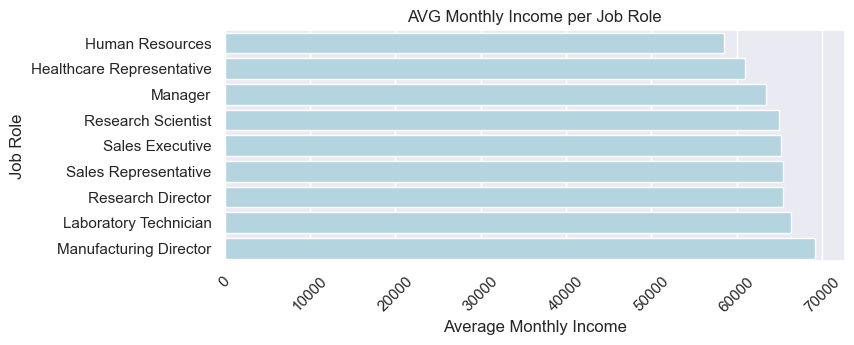

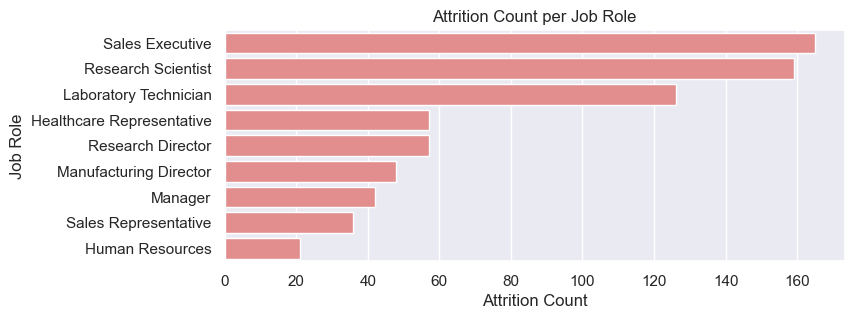

In [24]:
#AVG monthly income per Job role
plt.figure(figsize=(8, 3))
fig = sns.barplot(y=income_df_jobrole.index, x='MonthlyIncome', data=income_df_jobrole,
                  color="lightblue", ci=None)
fig.set_title('AVG Monthly Income per Job Role')
fig.set_xlabel('Average Monthly Income')
fig.set_ylabel('Job Role')
plt.xticks(rotation=45)
plt.yticks()
plt.show();

#Attrition count per Job role
plt.figure(figsize=(8, 3))
fig = sns.barplot(y=jobrole_atr_df.index, x='count', data=jobrole_atr_df,
                  color="lightcoral", ci=None)
fig.set_title('Attrition Count per Job Role')
fig.set_xlabel('Attrition Count')
fig.set_ylabel('Job Role')
plt.xticks(rotation=0)
plt.yticks()
plt.show();

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:0;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px;border-style: solid;border-color: dark green;"> 9-Monthly income per Education level</div> 

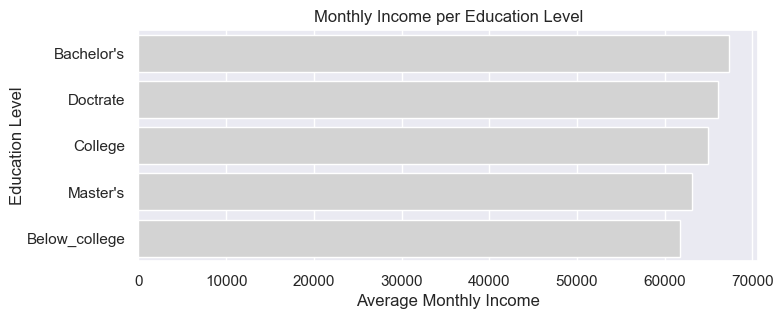

In [25]:
#Plotting Monthly Income per Education Level
plt.figure(figsize=(8, 3))
#Create a bar plot using Seaborn
fig = sns.barplot(y=edu_sal_df.index, x='MonthlyIncome', data=edu_sal_df, color='lightgrey')
#Set plot title, x-axis label, and y-axis label
fig.set_title('Monthly Income per Education Level')
fig.set_xlabel('Average Monthly Income')
fig.set_ylabel('Education Level', rotation=90)
fig.yaxis.labelpad = 1
#Rotate x-axis labels for better readability
plt.xticks(rotation=0)
#Show the plot
plt.show();

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:0;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px;border-style: solid;border-color: dark green;"> 10-Attrition Based on Business Travel</div> 

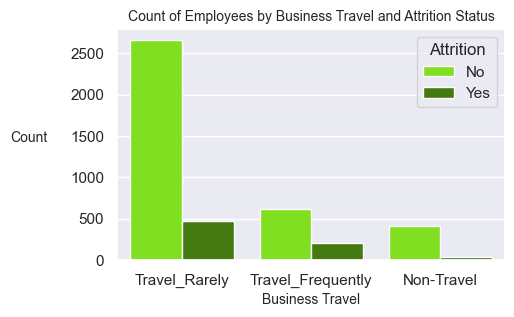

In [26]:
#Plotting Count of Employees by Business Travel and Attrition Status
plt.figure(figsize=(5, 3))
#Create a count plot using Seaborn
sns.countplot(x='BusinessTravel', hue='Attrition', data=df, palette=["#7FFF00", "#458B00"])
#Set x-axis label, y-axis label, and plot title
plt.xlabel('Business Travel', fontsize=10)
plt.ylabel('Count', fontsize=10, rotation=0, labelpad=30)
plt.title('Count of Employees by Business Travel and Attrition Status', fontsize=10)
#Display the plot
plt.show();

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:0;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px;border-style: solid;border-color: dark green;"> 11-Attrition Based on Distance From Home</div> 

C:\Users\ksund\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 500x300 with 0 Axes>

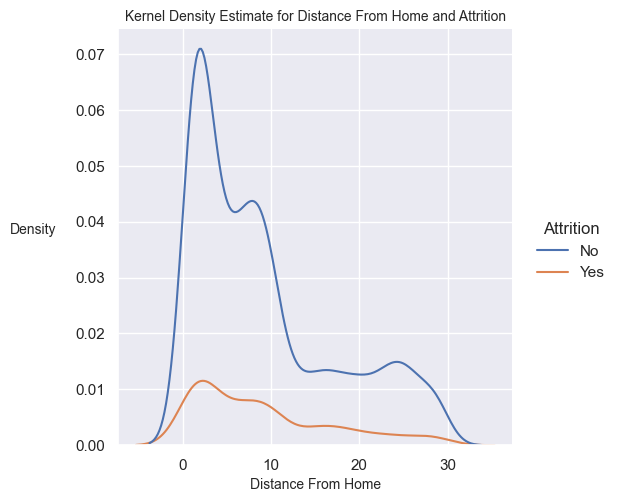

In [27]:
#Plotting Kernel Density Estimate (KDE) for Distance From Home and Attrition
plt.figure(figsize=(5, 3))
#Create a KDE plot using Seaborn
fig = sns.displot(df, x="DistanceFromHome", hue="Attrition", kind="kde")
#Set x-axis label, y-axis label, and plot title
plt.xlabel('Distance From Home', fontsize=10)
plt.ylabel('Density', fontsize=10, rotation=0, labelpad=30)
plt.title('Kernel Density Estimate for Distance From Home and Attrition', fontsize=10)
#Display the plot
plt.show();

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:0;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px;border-style: solid;border-color: dark green;"> 12-Attrition Based on Departments</div> 

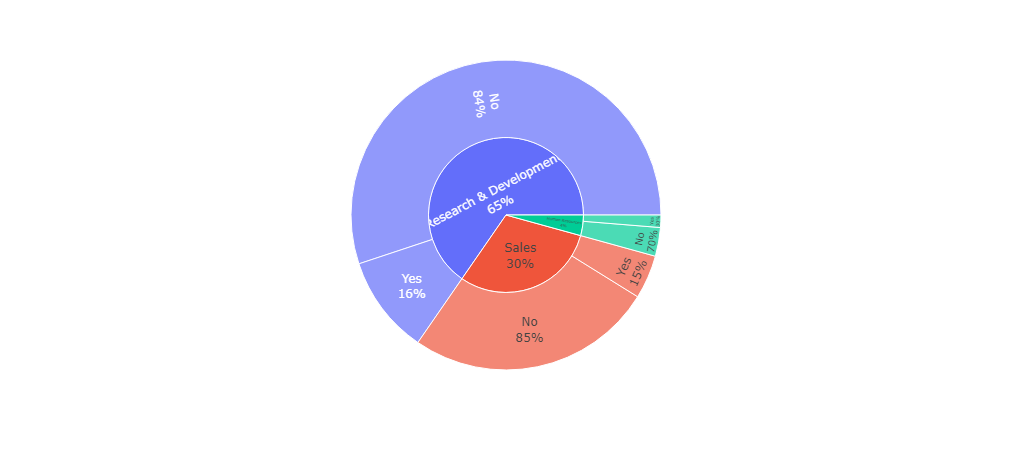

<Figure size 600x400 with 0 Axes>

In [28]:
#Plotting Sunburst Chart for Department-wise Attrition
plt.figure(figsize=(6, 4))
#Create a Sunburst Chart using Plotly Express
fig = px.sunburst(df, path=['Department', 'Attrition'], height=450).update_traces(textinfo="label+percent parent")
#Display the plot
fig.show();

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:0;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px;border-style: solid;border-color: dark green;"> 13-Count of People Spending Years with a Manager in an Organization</div> 

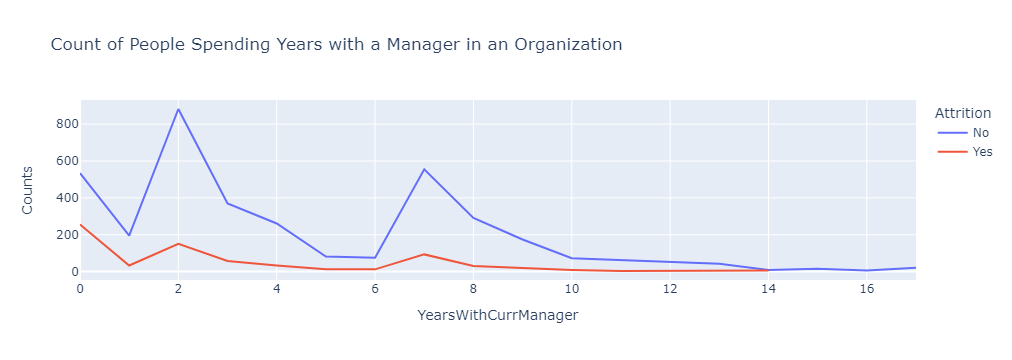

In [29]:
#Group and count by 'YearsWithCurrManager' and 'Attrition'
man_att = df.groupby(['YearsWithCurrManager', 'Attrition']).apply(lambda x: x['MonthlyIncome'].count()).reset_index(name='Counts')
#Create a line plot using Plotly Express
fig = px.line(man_att, x='YearsWithCurrManager', y='Counts', color='Attrition', 
              title='Count of People Spending Years with a Manager in an Organization')
#Show the plot
fig.show()

## Encoding and Feature Extraction

In [30]:
#Create a label encoder
label_encoder = LabelEncoder()
#Create a copy of the DataFrame for encoding
df1 = df.copy()
#Map categorical columns to numeric values using label encoding
df1['Attrition'] = df1['Attrition'].map({'Yes':1,'No':0})
df1['Over_time_Worked'] = df1['Over_time_Worked'].map({'Yes':1,'No':0})
df1['MaritalStatus'] = df1['MaritalStatus'].map({'Single':3,'Married':2,'Divorced':1})
df1['BusinessTravel'] = df1['BusinessTravel'].map({'Non-Travel':1, 'Travel_Rarely':2, 'Travel_Frequently':3})
df1['Gender']=label_encoder.fit_transform(df1['Gender'])
#Convert categorical attributes with more than 2 distinct values to numeric using one-hot encoding
df1 = pd.get_dummies(df1, columns=['Department', 'EducationField', 'JobRole'])
#Create additional features based on existing ones
df1['Employee_Satisfaction'] = df1['EnvironmentSatisfaction'] + df1['JobSatisfaction'] + df1['WorkLifeBalance']
df1['Employee_rating'] = df1['JobInvolvement'] + df1['PerformanceRating']
#Calculate 'Employee_risk_rating' based on specified conditions
df1['Employee_risk_rating'] = df1[['Over_time_Worked', 'BusinessTravel', 'Employee_rating', 'MonthlyIncome',
                                   'Employee_Satisfaction', 'JobLevel', 'StockOptionLevel', 'MaritalStatus',
                                   'TrainingTimesLastYear', 'Education']].apply(lambda x:
                                        0 + (1 if x['MonthlyIncome'] < 30000 else 0) +
                                        (1 if x['BusinessTravel'] == 2 else 0) +
                                        (1 if x['Employee_Satisfaction'] <= 3 else 0) +
                                        (1 if x['MaritalStatus'] == 3 else 0) +
                                        (1 if x['Education'] == 1 else 0) +
                                        (1 if x['Employee_rating'] <= 2 else 0) +
                                        (1 if x['JobLevel'] == 1 else 0) +
                                        (1 if x['StockOptionLevel'] == 0 else 0) +
                                        (1 if x['TrainingTimesLastYear'] == 0 else 0) +
                                        (1 if x['Over_time_Worked'] == 1 else 0),
                                        axis=1)

#Create 'CombinedExperience' based on the sum of specified columns
df1['CombinedExperience'] = df1['TotalWorkingYears'] + df1['YearsAtCompany'] + df1['YearsSinceLastPromotion'] + df1['YearsWithCurrManager']

#df1['Department']=label_encoder.fit_transform(df1['Department'])
#df1['EducationField']=label_encoder.fit_transform(df1['EducationField'])
#df1['JobRole']=label_encoder.fit_transform(df1['JobRole'])

## Correlation Matrix -Heat Map

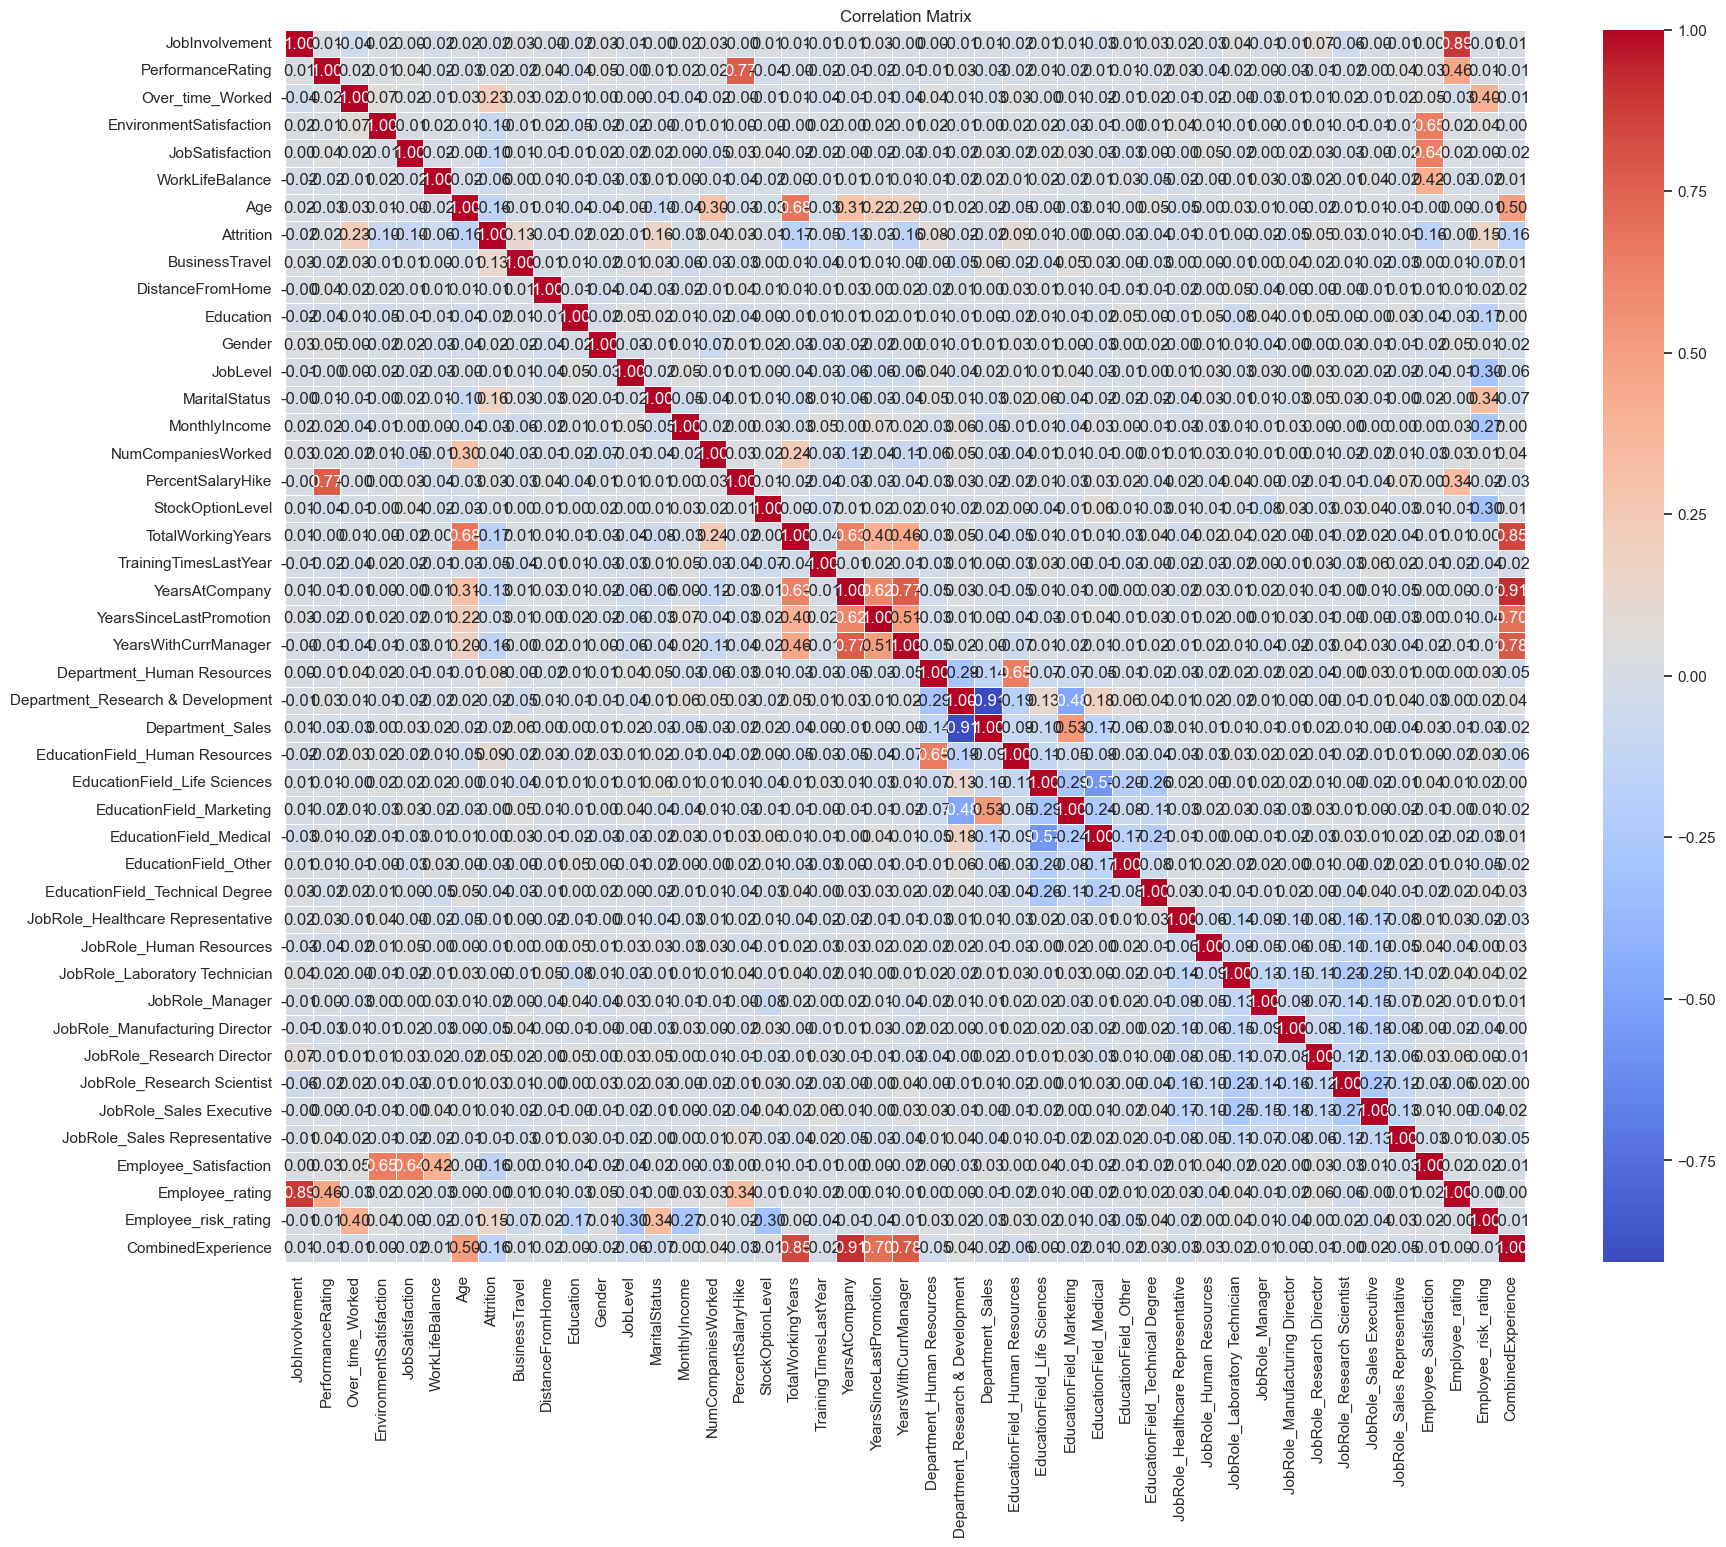

In [31]:
#Calculate the correlation matrix for the modified DataFrame (df1)
correlation_matrix1 = df1.corr()
#Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
#Set the title of the plot
plt.title("Correlation Matrix")
plt.show();

<div style="border-radius:10px;border:#254E58 solid;padding: 15px;background-color:white;font-size:110%;font-family: 'Times New Roman', Times, serif;text-align:left">
<h3 align="left"><font color=#254E58>💡 Analysis of graphs</font></h3>  
    
- Attrition is the highest for both men and women from 18 to 35 years of age and gradually decreases.
- As income increases, attrition decreases.
- Attrition is much, much less in divorced women.
- Attrition is higher for employees who usually travel than others, and this rate is higher for women than for men.
- Attrition is the highest for those in level 1 jobs.
- Women with the job position of manager, research director and technician laboratory have almost no attrition.
- Men with the position of sales expert have a lot of attrition.

In [32]:
#Dropping columns based on multicollinearity and feature extraction
df1.drop(columns=['EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance','JobInvolvement',
                  'PerformanceRating','TotalWorkingYears','YearsAtCompany','YearsSinceLastPromotion',
                  'YearsWithCurrManager'],inplace=True)

In [33]:
df1.drop(columns=['EducationField_Human Resources','Department_Sales'],inplace=True)

In [34]:
#Export the DataFrame 'df_final' to a CSV file named 'Cleaned_data_for_modelling' without including the index
df1.to_csv('Cleaned_data_for_modelling', index=False)

<div id="custom-header" style="padding: 0px; color: white; margin: 0; font-size: 22px; font-family: 'Times New Roman', Times, serif; text-align: center; display: fill; border-radius: 10px; background-color: #6D214F; overflow: hidden; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <b>  Data Modelling </b>
</div>

## Extracting Target and Features

In [35]:
#Target variable (Attrition)
y = df1['Attrition']  
#Features (excluding the target variable)
X = df1.drop(columns='Attrition')  

## Data Splitting and Resampling


In [36]:
#Split the data into training, validation, and testing sets (stratified)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#Further split the temporary set into validation and test sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp)
#Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
#Apply feature scaling using StandardScaler
scaler = StandardScaler()
#Fit and transform the scaler on training data
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
#Transform the validation and test data using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
#Get the shape of each training, validation, and testing set
#List of variable names
variable_names = ['X_train_resampled_scaled', 'X_val_scaled', 'X_test_scaled', 'y_train_resampled', 'y_val', 'y_test']
#Iterate through the variable names and print their shapes
for var_name in variable_names:
    var = locals()[var_name]  # Access the variable by its name
    print(f"Shape of {var_name}: {var.shape}")


Shape of X_train_resampled_scaled: (4734, 33)
Shape of X_val_scaled: (706, 33)
Shape of X_test_scaled: (882, 33)
Shape of y_train_resampled: (4734,)
Shape of y_val: (706,)
Shape of y_test: (882,)


In [37]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [38]:
"""
input_list=[]
for i in X.columns:
    user_input=input(f'input data for {i}')
    input_list.append(user_input)
pred_list = [int(element) for element in input_list]
pred_list_scal=scaler.transform([pred_list])"""

"\ninput_list=[]\nfor i in X.columns:\n    user_input=input(f'input data for {i}')\n    input_list.append(user_input)\npred_list = [int(element) for element in input_list]\npred_list_scal=scaler.transform([pred_list])"

## Model Evaluation and Comparison


In [39]:
#List of classifiers to consider
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Classifier': SVC(probability=True, random_state=42),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42)
}

score_list = []

#Train and evaluate each classifier
for name, classifier in classifiers.items():
    #Train the model
    classifier.fit(X_train_resampled_scaled, y_train_resampled)
    #Make predictions on the validation set
    y_val_pred = classifier.predict(X_val_scaled)
    y_val_prob = classifier.predict_proba(X_val_scaled)[:, 1]

    #Make predictions on the test set
    y_test_pred = classifier.predict(X_test_scaled)
    #Evaluation metrics for validation set
    Accuracy_val = round(accuracy_score(y_val, y_val_pred), 4)
    Precision_val = round(precision_score(y_val, y_val_pred), 4)
    Recall_val = round(recall_score(y_val, y_val_pred), 4)
    F1_Score_val = round(f1_score(y_val, y_val_pred), 4)
    ROC_AUC_Score_val = round(roc_auc_score(y_val, y_val_prob), 4)

    #Evaluation metrics for test set
    Accuracy_test = round(accuracy_score(y_test, y_test_pred), 4)
    Precision_test = round(precision_score(y_test, y_test_pred), 4)
    Recall_test = round(recall_score(y_test, y_test_pred), 4)
    F1_Score_test = round(f1_score(y_test, y_test_pred), 4)
    ROC_AUC_Score_test = round(roc_auc_score(y_test, y_test_pred), 4)

    score_list.append({
        'Classifier_Name': name,
        'Accuracy_val': Accuracy_val,
        'Precision_val': Precision_val,
        'Recall_val': Recall_val,
        'F1_Score_val': F1_Score_val,
        'ROC_AUC_Score_val': ROC_AUC_Score_val,
        'Accuracy_test': Accuracy_test,
        'Precision_test': Precision_test,
        'Recall_test': Recall_test,
        'F1_Score_test': F1_Score_test,
        'ROC_AUC_Score_test': ROC_AUC_Score_test
    })

    print(f"\n{40*'='}\n{name}\n{40*'='}")
    print("Validation Accuracy:", Accuracy_val)
    print("Classification Report:\n", classification_report(y_val, y_val_pred))
    print("Test Accuracy: ", Accuracy_test)
    print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

model_score_df = pd.DataFrame(score_list)


Logistic Regression
Validation Accuracy: 0.8272
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90       592
           1       0.47      0.54      0.50       114

    accuracy                           0.83       706
   macro avg       0.69      0.71      0.70       706
weighted avg       0.84      0.83      0.83       706

Test Accuracy:  0.8333
Test Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       740
           1       0.48      0.47      0.48       142

    accuracy                           0.83       882
   macro avg       0.69      0.69      0.69       882
weighted avg       0.83      0.83      0.83       882


Random Forest
Validation Accuracy: 0.9816
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       592
           1       0.99      0.89      0.94  

##### Comparing Models

In [40]:
model_score_df

Classifier_Name  Accuracy_val  Precision_val  Recall_val  \
0     Logistic Regression        0.8272         0.4697      0.5439   
1           Random Forest        0.9816         0.9903      0.8947   
2       Gradient Boosting        0.8796         0.6179      0.6667   
3  Support Vector Machine        0.9207         0.8021      0.6754   
4  DecisionTreeClassifier        0.9745         0.9000      0.9474   

   F1_Score_val  ROC_AUC_Score_val  Accuracy_test  Precision_test  \
0        0.5041             0.7921         0.8333          0.4820   
1        0.9401             0.9969         0.9864          0.9851   
2        0.6414             0.8713         0.8662          0.5984   
3        0.7333             0.9462         0.9240          0.8261   
4        0.9231             0.9635         0.9649          0.8364   

   Recall_test  F1_Score_test  ROC_AUC_Score_test  
0       0.4718         0.4769              0.6873  
1       0.9296         0.9565              0.9634  
2       0.5141         0.5530              0.7239  
3       0.6690         0.7393              0.8210  
4       0.9718         0.8990              0.9677

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%;font-family: 'Times New Roman', Times, serif; text-align:left">

<h3 align="lefAt"><font color=brown>📊 Key Findings:</font></h3>
Let's analyze the insights from the provided metrics for employee attrition prediction:

1. **Logistic Regression:**
   - The logistic regression model shows decent performance on the validation set with an accuracy of 82.72%.
   - Precision is relatively low, indicating that the model has a moderate number of false positives.
   - The recall is reasonable, suggesting the model captures a good proportion of actual positive cases.
   - The F1 Score is at 50.41%, balancing precision and recall.
   - The ROC AUC Score of 79.21% indicates a good ability to distinguish between classes.
   - On the test set, the accuracy is 83.33%, and other metrics maintain a similar balance.

2. **Random Forest:**
   - The Random Forest model excels in performance on both the validation and test sets.
   - High accuracy (98.16% on validation, 98.64% on test) indicates strong overall predictive ability.
   - Precision, recall, and F1 Score are all high, showcasing excellent balance and capturing both positive and negative cases effectively.
   - ROC AUC Scores are close to 1, indicating near-perfect discrimination between classes.

3. **Gradient Boosting:**
   - Gradient Boosting performs reasonably well on the validation set, but there's a decrease in precision and recall on the test set.
   - The model may have overfit the training data, as evidenced by the drop in performance on the test set.
   - This could be mitigated by tuning hyperparameters or adjusting the model complexity.

4. **Support Vector Machine (SVM):**
   - SVM shows good overall performance, with high accuracy, precision, recall, and F1 Score on both validation and test sets.
   - The ROC AUC Scores are also high, indicating strong discriminative ability.

5. **Decision Tree Classifier:**
   - The Decision Tree model exhibits high accuracy, precision, recall, and F1 Score on both validation and test sets.
   - It shows good discriminative ability with a high ROC AUC Score.

**Overall Insights:**
- Random Forest and Decision Tree models demonstrate excellent performance across all metrics and are well-suited for employee attrition prediction.
- SVM also performs well, providing a good balance between precision and recall.
- Logistic Regression and Gradient Boosting show decent performance but may benefit from further tuning or exploration of feature importance.

Considering the high accuracy, precision, and recall of Random Forest, it stands out as a strong candidate for employee attrition prediction. However, it's essential to consider factors like interpretability, computational cost, and business requirements when choosing a final model. Further exploration, tuning, and validation using unseen data may also be beneficial.
<br></div>

In [41]:
#Function to display confusion matrix
def display_confusion_matrix(title, y_actual, y_pred):
    #Create a confusion matrix
    conf_matrix = confusion_matrix(y_actual, y_pred)
    #Plot the confusion matrix
    plt.figure(figsize=(3, 2))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

#Function to display importance features of model in sorted way
def display_feature_importance(title,model_rf, X_train_resampled):
    #Get feature importances from the model
    feature_importance = model_rf.feature_importances_
    #Create a DataFrame to store feature names and importances
    feature_importance_df = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': feature_importance})
    #Sort the DataFrame by importance in descending order
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    #Plot the sorted feature importances
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title(f'Feature Importance -{title} Classifier')
    plt.show()

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:0;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px;border-style: solid;border-color: dark green;"> Model-1 Random Forest Classifier</div> 

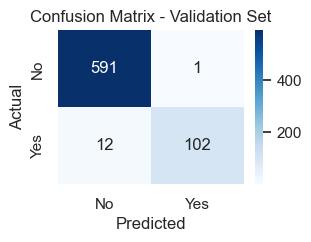

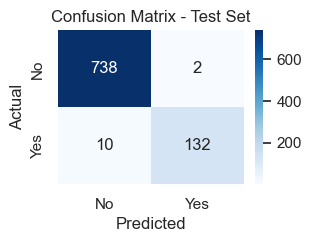

In [42]:
model_rf=RandomForestClassifier(random_state=42)
model_rf.fit(X_train_resampled_scaled, y_train_resampled)
y_val_pred_rf = model_rf.predict(X_val_scaled)
y_val_prob_rf = model_rf.predict_proba(X_val_scaled)[:, 1]
#Make predictions on the test set
y_test_pred_rf = model_rf.predict(X_test_scaled)
#Display confusion matrices
display_confusion_matrix(title='Validation Set', y_actual=y_val, y_pred=y_val_pred_rf)
display_confusion_matrix(title='Test Set', y_actual=y_test, y_pred=y_test_pred_rf)

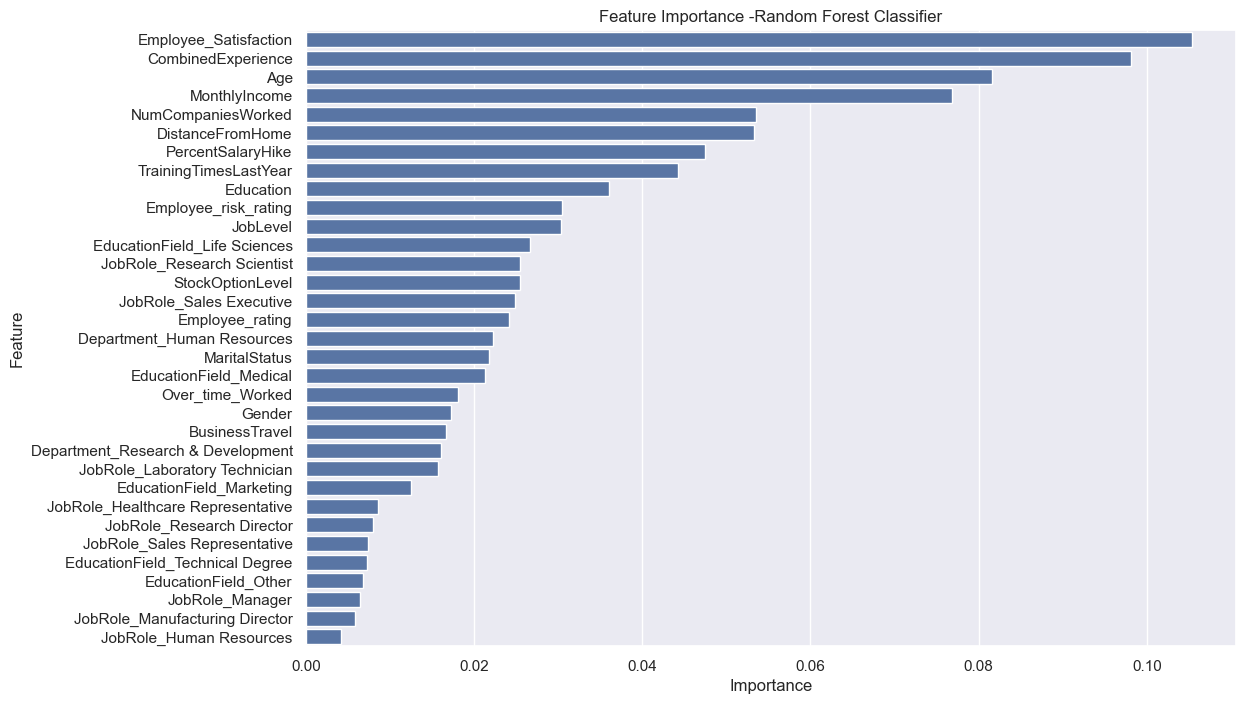

In [43]:
#Display important features
title='Random Forest'
display_feature_importance(title,model_rf,X_train_resampled)

In [51]:
#model_rf.predict(pred_list_scal)
joblib.dump(model_rf, 'model_rf.pkl')

['model_rf.pkl']

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:0;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px;border-style: solid;border-color: dark green;"> Model-2 Decision Tree Classifier</div> 

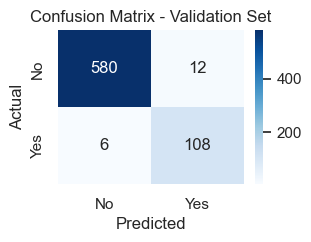

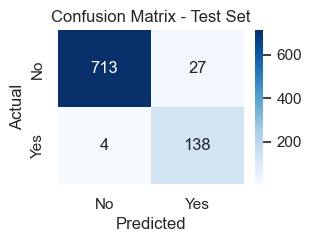

In [45]:
model_dtc=DecisionTreeClassifier(random_state=42)
model_dtc.fit(X_train_resampled_scaled, y_train_resampled)
y_val_pred_dtc = model_dtc.predict(X_val_scaled)
y_val_prob_dtc = model_dtc.predict_proba(X_val_scaled)[:, 1]
#Make predictions on the test set
y_test_pred_dtc = model_dtc.predict(X_test_scaled)
display_confusion_matrix(title='Validation Set', y_actual=y_val, y_pred=y_val_pred_dtc)
display_confusion_matrix(title='Test Set', y_actual=y_test, y_pred=y_test_pred_dtc)

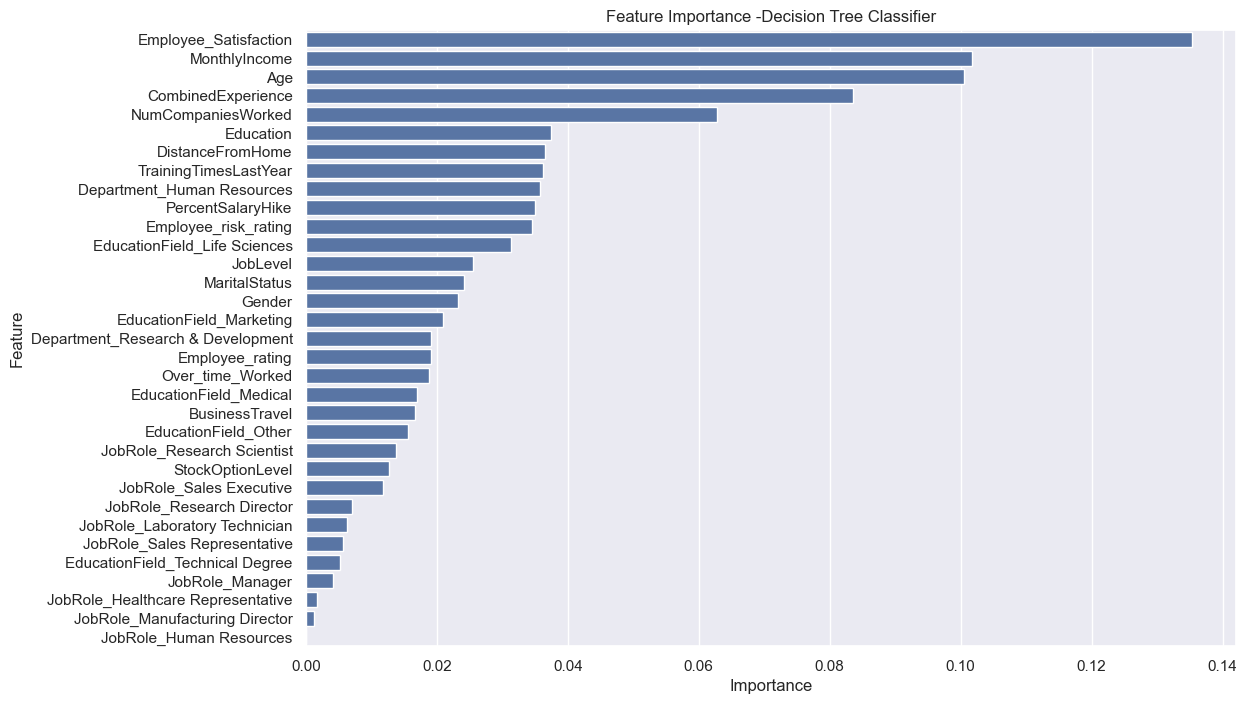

In [46]:
#Display important features
title='Decision Tree'
display_feature_importance(title,model_dtc,X_train_resampled)

In [52]:
#model_dtc.predict(pred_list_scal)
joblib.dump(model_dtc, 'model_dtc.pkl')

['model_dtc.pkl']

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:0;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px;border-style: solid;border-color: dark green;"> Model-3 Gradient Boosting Classifier</div> 

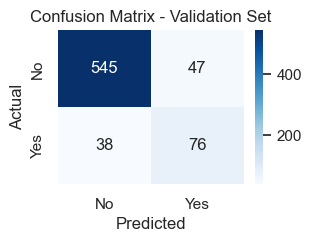

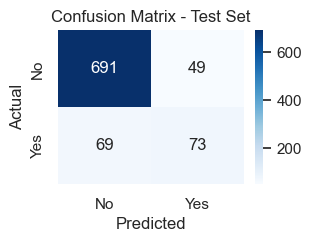

In [48]:
model_gbc=GradientBoostingClassifier(random_state=42)
model_gbc.fit(X_train_resampled_scaled, y_train_resampled)
y_val_pred_gbc = model_gbc.predict(X_val_scaled)
y_val_prob_gbc = model_gbc.predict_proba(X_val_scaled)[:, 1]
#Make predictions on the test set
y_test_pred_gbc= model_gbc.predict(X_test_scaled)
display_confusion_matrix(title='Validation Set', y_actual=y_val, y_pred=y_val_pred_gbc)
display_confusion_matrix(title='Test Set', y_actual=y_test, y_pred=y_test_pred_gbc)

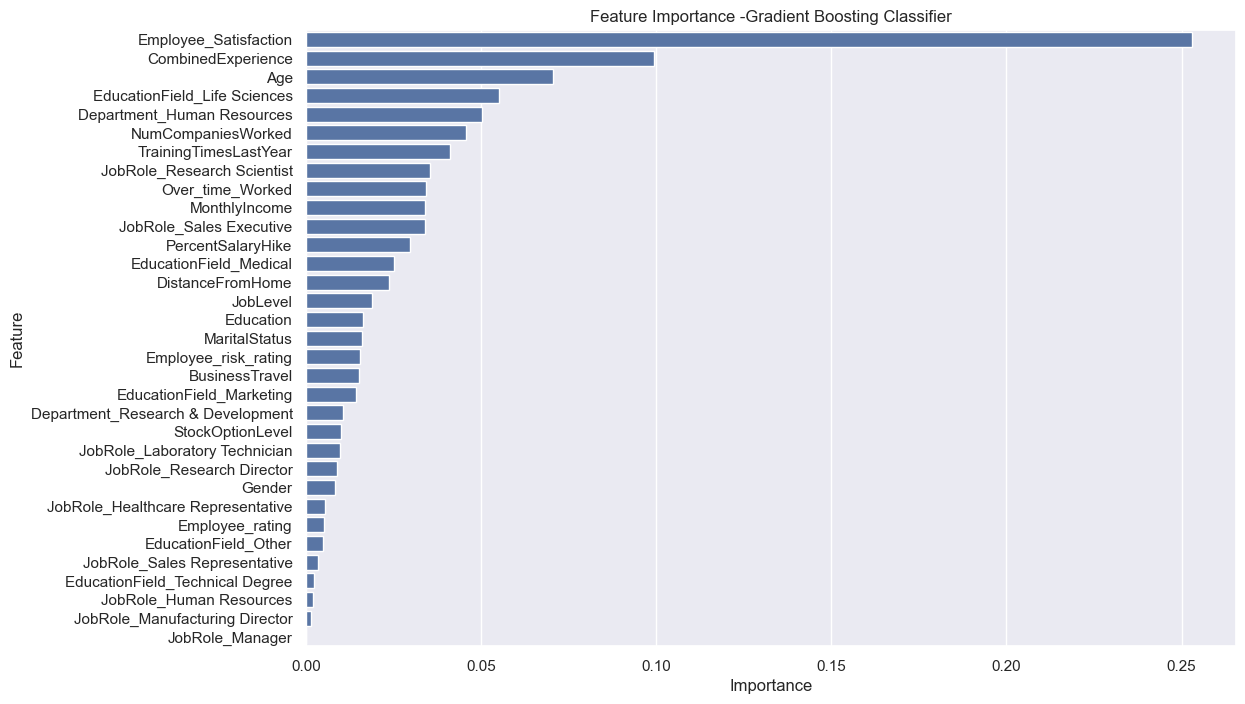

In [49]:
#Display important features
title='Gradient Boosting'
display_feature_importance(title,model_gbc,X_train_resampled)

In [53]:
#model_gbc.predict(pred_list_scal)
joblib.dump(model_gbc, 'model_gbc.pkl')

['model_gbc.pkl']

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:0;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px;border-style: solid;border-color: dark green;"> Model-4 Logistic Regression</div> 

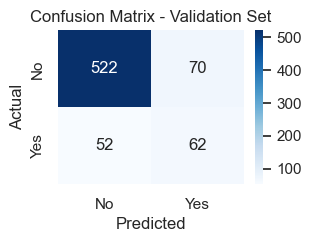

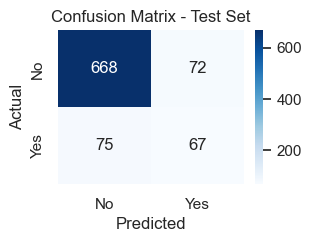

In [56]:
model_lr=LogisticRegression(random_state=42)
model_lr.fit(X_train_resampled_scaled, y_train_resampled)
y_val_pred_lr = model_lr.predict(X_val_scaled)
y_val_prob_lr = model_lr.predict_proba(X_val_scaled)[:, 1]
#Make predictions on the test set
y_test_pred_lr= model_lr.predict(X_test_scaled)
display_confusion_matrix(title='Validation Set', y_actual=y_val, y_pred=y_val_pred_lr)
display_confusion_matrix(title='Test Set', y_actual=y_test, y_pred=y_test_pred_lr)

In [62]:
joblib.dump(model_lr, 'model_lr.pkl')

['model_lr.pkl']

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:0;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 20px;border-style: solid;border-color: dark green;"> Model-5 Support Vector Classifier</div> 

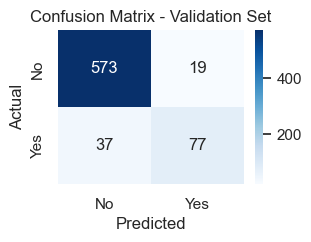

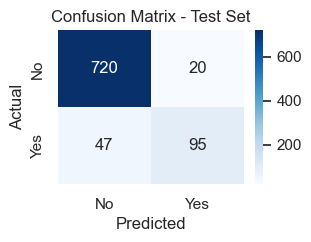

In [58]:
model_svc=SVC(probability=True, random_state=42)
model_svc.fit(X_train_resampled_scaled, y_train_resampled)
y_val_pred_svc = model_svc.predict(X_val_scaled)
y_val_prob_svc = model_svc.predict_proba(X_val_scaled)[:, 1]
#Make predictions on the test set
y_test_pred_svc= model_svc.predict(X_test_scaled)
display_confusion_matrix(title='Validation Set', y_actual=y_val, y_pred=y_val_pred_svc)
display_confusion_matrix(title='Test Set', y_actual=y_test, y_pred=y_test_pred_svc)

In [61]:
joblib.dump(model_svc, 'model_svc.pkl')

['model_svc.pkl']

<div id="custom-header" style="padding: 0px; color: white; margin: 0; font-size: 22px; font-family: 'Times New Roman', Times, serif; text-align: center; display: fill; border-radius: 10px; background-color: #6D214F; overflow: hidden; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <b>  Conclusion </b>
</div>

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; font-family: 'Times New Roman', Times, serif; text-align:left">

<h3 align="lefAt"><font color=brown>💬 Inference:</font></h3>

- The following features showedsignificant associations with employee attrition:<br>
    
    1. Employee-Satisfaction(Job satisfication,Worklife Balance,Environment Satisfication<br>
    2. Experiences<br>
    3. Monthly Income<br>
    4. Employee Risk Rating<br>
    5. Overtime <br>
    6. % Salary Hike<br>
    7. JobLevel<br>
    8. MaritalStatus<br>
    9. Education<br>
    10. Num-Companies Worked<br>
    11. Age.<br>
    12. Distance From Home <br>
    13. Training Time Last Year <br>

   
    
- It is important for the organization to pay attention to the identified significant features and consider them when implementing strategies to reduce attrition rates.<br></div>

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ;font-family: 'Times New Roman', Times, serif; font-size:100%; text-align:left">

<h3 align="lefAt"><font color=brown> Recommendations:</font></h3>

- The below recommendations is based on the key findings related to reducing attrition rate.<br>


1. Age:<br>
    - Implement strategies to address the specific needs and career aspirations of employees across different age groups.
    - This can include offering targeted development opportunities, mentorship programs, and flexible work arrangements to support work-life balance.<br>

    
2. Compensation:<br>
    - Regularly review and benchmark compensation packages to ensure they are competitive in the market.<br>
    - Consider incorporating performance-based incentives and rewards to motivate employees and recognize their contributions.<br>

    
3. Job experience:<br>
    - Provide opportunities for career advancement, skill development, and cross-functional training.<br>
    - Establish clear career paths and provide regular feedback and performance evaluations to support employee growth and engagement.<br>

    
4. Specific job-related variables:
    - Tailor retention strategies based on different job roles and responsibilities.<br>
    - This can include improving job satisfaction, providing challenging assignments, and fostering a positive work environment.

    
5. Job-related aspects:<br>
    - Enhance employee engagement and job satisfaction by offering a supportive work environment.<br>
    - Provide opportunities for professional development, promote a culture of continuous learning, and ensure fair and transparent processes for promotions and career growth.<br>

    
6. Work-related factors:<br>
    - Focus on improving factors such as environment satisfaction, job involvement, job satisfaction, work-life balance, and managing overtime demands.<br>
    - Conduct regular employee surveys to understand their concerns and feedback, and take proactive measures to address any identified areas of improvement.<br>

    
7. Overall:<br>
    - Foster a positive organizational culture that values employee well-being, work-life balance, and growth opportunities.<br> 
    - Encourage open communication, provide avenues for feedback and suggestions, and regularly evaluate and refine retention strategies based on employee feedback and changing needs.<br></div>

<h3 align="center"><font color=green> The Random Forest Classifier Provides accuracy of around 98% </font></h3>  